In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [8]:
# 2. Datensatz laden (California Housing Dataset)
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # Ziel: Median-Hauswert in 100.000 USD

# Datenbeschreibung
"""
data_description:
Der California Housing Dataset enthält 20.640 Beobachtungen von Wohnblöcken in Kalifornien. 
Merkmale: 
- longitude, latitude: Geografische Koordinaten
- housing_median_age: Durchschnittsalter der Gebäude
- total_rooms, total_bedrooms: Gesamtzahl der Räume/Schlafzimmer
- population, households: Bevölkerung und Haushalte pro Block
- median_income: Median-Einkommen (in Zehntausend USD)
Zielvariable: median_house_value (in 100.000 USD). 
Die Daten sind numerisch, ohne fehlende Werte, ideal für Regressionsaufgaben.
"""


In [9]:
# 3.1 Aufteilung in Train- und Testdatensatz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train-Datensatz: {X_train.shape}, Test-Datensatz: {X_test.shape}")

Train-Datensatz: (16512, 8), Test-Datensatz: (4128, 8)


# 3.2 Algorithmusauswahl: Lineare Regression
Begründung :
Lineare Regression wurde gewählt, da die Beziehung zwischen Merkmalen wie median_income und 
median_house_value oft annähernd linear ist. Der Datensatz ist numerisch und gut strukturiert, 
was komplexere Modelle wie neuronale Netze weniger notwendig macht. Lineare Regression ist 
interpretierbar und effizient für Regressionsaufgaben mit kontinuierlichen Zielvariablen. 
Das Modell wird auf den Trainingsdaten trainiert und mit dem Testdatensatz evaluiert

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
model = LinearRegression()
model.fit(X_train, y_train)

# Modellleistung auf Trainingsdaten
train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
print(f"Trainings-MSE: {train_mse:.4f}")

Trainings-MSE: 0.5179


In [13]:
# 3.3 Vorhersagen auf Testdatensatz und manuelle Überprüfung
y_pred = model.predict(X_test)


Manuelle Überprüfung (Testdaten):
Beobachtung 1: Tatsächlicher Hauswert: $47700.00, Vorhergesagt: $71912.28
Beobachtung 2: Tatsächlicher Hauswert: $45800.00, Vorhergesagt: $176401.66
Beobachtung 3: Tatsächlicher Hauswert: $500001.00, Vorhergesagt: $270965.88
Beobachtung 4: Tatsächlicher Hauswert: $218600.00, Vorhergesagt: $283892.59
Beobachtung 5: Tatsächlicher Hauswert: $278000.00, Vorhergesagt: $260465.73


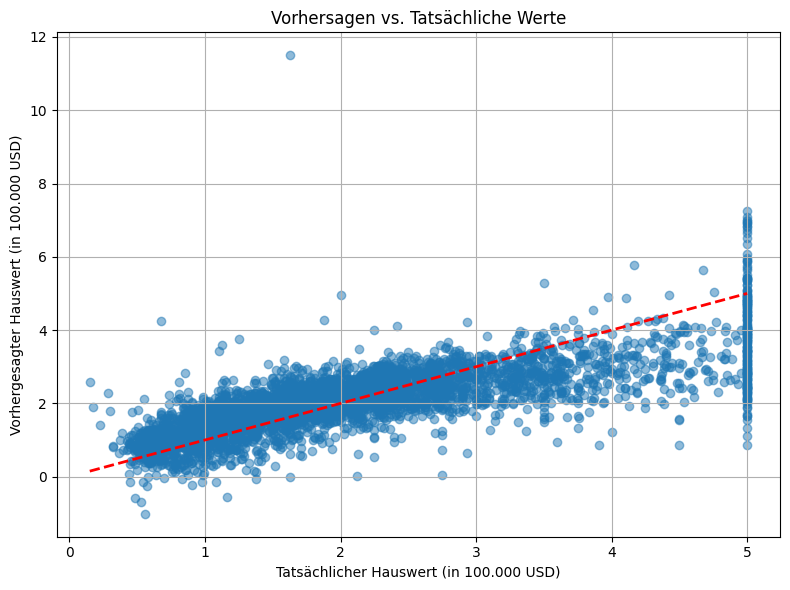

In [14]:
# Manuelle Überprüfung der ersten 5 Vorhersagen
print("\nManuelle Überprüfung (Testdaten):")
for i in range(5):
    print(f"Beobachtung {i+1}: Tatsächlicher Hauswert: ${y_test[i]*100000:.2f}, Vorhergesagt: ${y_pred[i]*100000:.2f}")

# Visualisierung der Vorhersagen
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Tatsächlicher Hauswert (in 100.000 USD)")
plt.ylabel("Vorhergesagter Hauswert (in 100.000 USD)")
plt.title("Vorhersagen vs. Tatsächliche Werte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Erkenntnisse (50-100 Wörter):
Das Modell sagt den Median-Hauswert mit akzeptabler Genauigkeit voraus (niedriger MSE). 
Die Vorhersagen liegen meist nahe an den tatsächlichen Werten, wie die manuelle Überprüfung 
und der Scatterplot zeigen. Abweichungen treten bei extrem hohen oder niedrigen Werten auf, 
was auf die linearen Annahmen des Modells zurückzuführen ist. Für diesen Datensatz ist die 
lineare Regression geeignet, aber Modelle wie Random Forests könnten die Genauigkeit weiter 
verbessern. Das Modell ist insgesamt funktional und sinnvoll.

3.4 Repository-Adresse
Bitte geben Sie die aktualisierte Adresse Ihres Repositorys via Formular an Ihre Lehrperson weiter.
